In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import cartesian
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [2]:
def preprocess_trips(trips_df):

    trips_df.dropna(inplace=True)

    locations = trips_df['start_station_id'].unique()
    new_ids = list(range(len(locations)))
    mapping = dict(zip(locations, new_ids))
    
    trips_df['start_station_id'] = trips_df['start_station_id'].map(mapping)
    trips_df['end_station_id'] = trips_df['end_station_id'].map(mapping)

    trips_df["started_at"] = pd.to_datetime(trips_df["started_at"], format="%Y-%m-%d %H:%M:%S")
    trips_df["ended_at"] = pd.to_datetime(trips_df["ended_at"], format="%Y-%m-%d %H:%M:%S")
    
    trips['tripduration'] = (trips['ended_at'] - trips['started_at']).dt.total_seconds() / 60.0

    cols_to_drop = ["member_casual", "rideable_type", ]
    trips_df.drop(cols_to_drop, axis=1, inplace=True)

    trips_df = trips.sort_values(by="started_at")
    
    return trips_df

In [3]:
trips = pd.read_csv("../Data/divvybikes-data/divvybikes-test.csv")
preprocess_trips(trips)

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,tripduration
74346,5DB63F4E4EB6A9CF,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Ave,513,Pine Grove Ave & Waveland Ave,260.0,41.9359,-87.6784,41.9493,-87.6463,22.550000
46139,1FD159E93F7BAFA1,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,56,Wabash Ave & 9th St,12.0,41.8604,-87.6258,41.8708,-87.6257,8.166667
17735,6D93A270684EC452,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Ave,513,Spaulding Ave & Armitage Ave,418.0,41.9359,-87.6784,41.9171,-87.7102,21.650000
53075,091D47E4F0FC5022,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Ave,5,Clark St & Schiller St,192.0,41.8969,-87.6217,41.9080,-87.6315,7.283333
46138,07F785C9DDA3404C,2020-04-01 00:11:18,2020-04-01 00:11:51,Wabash Ave & 9th St,12,Wabash Ave & 9th St,12.0,41.8708,-87.6257,41.8708,-87.6257,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...
80628,042ED7E4DB510E06,2020-04-30 23:46:32,2020-04-30 23:53:36,Dearborn St & Monroe St,372,Wabash Ave & Grand Ave,141.0,41.8813,-87.6295,41.8915,-87.6268,7.066667
47438,7CE956F2ADAB70E7,2020-04-30 23:52:12,2020-04-30 23:58:28,Sheffield Ave & Waveland Ave,160,Clark St & Grace St,41.0,41.9494,-87.6545,41.9508,-87.6592,6.266667
2970,7DD8DE9332472655,2020-04-30 23:54:57,2020-05-01 00:28:29,Sheffield Ave & Webster Ave,340,Sheffield Ave & Webster Ave,340.0,41.9215,-87.6538,41.9215,-87.6538,33.533333
47103,3F2515CBB67A52E2,2020-04-30 23:57:13,2020-05-01 00:12:08,California Ave & Altgeld St,411,Southport Ave & Clybourn Ave,211.0,41.9267,-87.6977,41.9208,-87.6637,14.916667


trips['started_at'] = pd.to_datetime(trips['started_at'])
trips['ended_at'] = pd.to_datetime(trips['ended_at'])
trips['tripduration'] = (trips['ended_at'] - trips['started_at']).dt.total_seconds() / 60.0

#trips.head()


cols_to_drop = ["member_casual", "rideable_type", ]
trips.dropna(inplace=True)
trips.drop(cols_to_drop, axis=1, inplace=True)
#trips.head()

locations = trips['start_station_id'].unique()
new_ids = list(range(len(trips['start_station_id'].unique())))
mapping = dict(zip(locations, new_ids))

trips['start_station_id'] = trips['start_station_id'].map(mapping)
trips['end_station_id'] = trips['end_station_id'].map(mapping)
#trips.head()

trips = trips.sort_values(by="started_at")
#trips.head()

<Axes: xlabel='index', ylabel='trips_per_hour'>

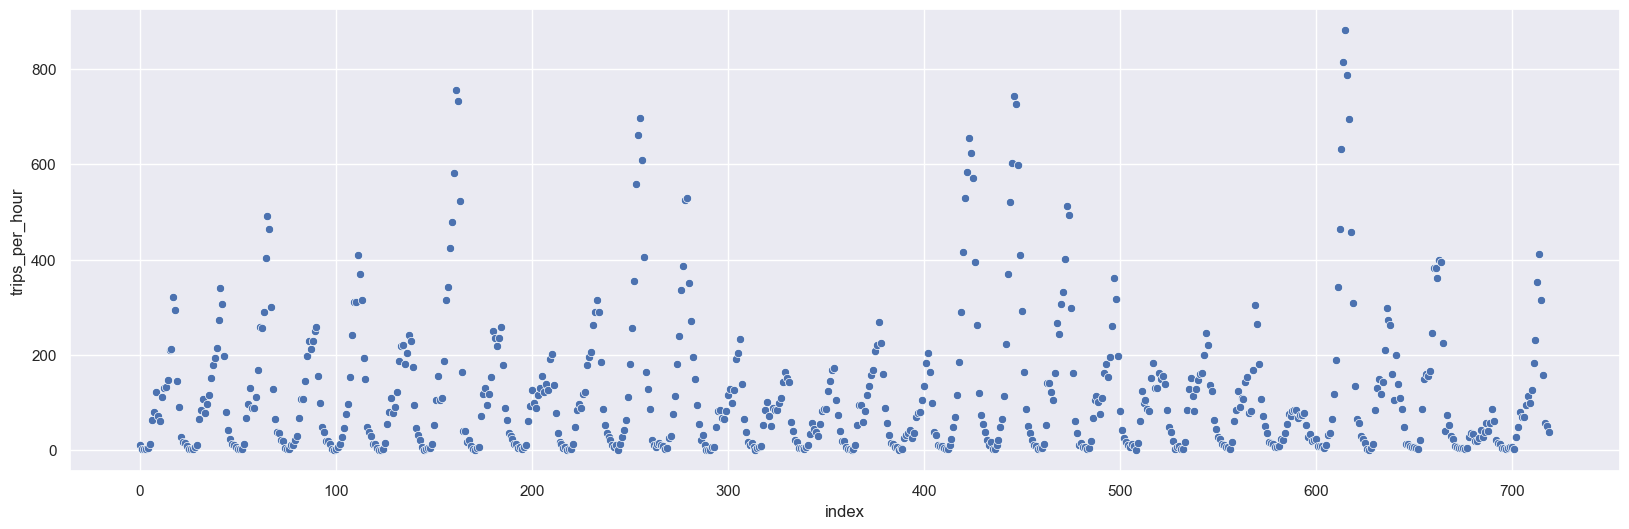

In [4]:
from datetime import datetime, timedelta
import seaborn as sns
sns.set(rc={'figure.figsize':(20,6)})

trips["started_at"] = pd.to_datetime(trips["started_at"], format="%Y-%m-%d %H:%M:%S")
trips["ended_at"] = pd.to_datetime(trips["ended_at"], format="%Y-%m-%d %H:%M:%S")

start_date = datetime.strptime("2020-04-01 00:00:30", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2020-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=60)
bucket_elements = []
while start_date <= end_date:
    bucket_elements.append(trips[((start_date + interval) >= trips["ended_at"])
                                & (start_date <= trips["ended_at"])].shape[0])
    start_date += interval

sns.scatterplot(x="index", y="trips_per_hour", data=pd.DataFrame(bucket_elements, columns=["trips_per_hour"]).reset_index())

In [5]:
outgoing_trips = trips.groupby("start_station_id").count()["ride_id"].values
incoming_trips = trips.groupby("end_station_id").count()["ride_id"].values

all_station_ids = set(trips["start_station_id"].unique()) | set(trips["end_station_id"].unique())

outgoing_trips = np.pad(outgoing_trips, (0, len(all_station_ids) - len(outgoing_trips)), mode='constant')
incoming_trips = np.pad(incoming_trips, (0, len(all_station_ids) - len(incoming_trips)), mode='constant')

outgoing_trips = (outgoing_trips - np.min(outgoing_trips)) / (np.max(outgoing_trips) - np.min(outgoing_trips))
incoming_trips = (incoming_trips - np.min(incoming_trips)) / (np.max(incoming_trips) - np.min(incoming_trips))

node_features = np.stack([outgoing_trips, incoming_trips]).transpose()
print("Full shape: ", node_features.shape)
node_features[:10]

Full shape:  (603, 2)


array([[0.26      , 0.26203807],
       [0.09647059, 0.09742441],
       [0.47647059, 0.44008959],
       [0.20941176, 0.22732363],
       [0.18823529, 0.16797312],
       [0.46588235, 0.40761478],
       [0.23647059, 0.17581187],
       [0.11058824, 0.0862262 ],
       [0.34705882, 0.32698768],
       [0.06470588, 0.06942889]])

In [6]:

subset = ["start_lng", "start_lat", "start_station_id"]
all_starts = trips.drop_duplicates(subset="start_station_id", keep="first")[subset]

subset = ["end_lng", "end_lat", "end_station_id"]
all_ends = trips.drop_duplicates(subset="end_station_id", keep="first")[subset]
distance_matrix = all_ends.merge(all_starts, how="cross")
distance_matrix["distance"] = distance_matrix.apply(lambda x: geodesic((x["start_lat"], x["start_lng"]), 
                                                        (x["end_lat"], x["end_lng"])).meters, axis=1)
#distance_matrix.head()

In [7]:
distance_matrix["edge"] = distance_matrix["distance"] < 500
#distance_matrix.head()

In [8]:
edge_index = distance_matrix[distance_matrix["edge"] == True][["start_station_id", "end_station_id"]].values
edge_index = edge_index.transpose()
#edge_index

In [9]:
distance_feature = distance_matrix[distance_matrix["edge"] == True]["distance"].values
edge_type_feature = np.zeros_like(distance_feature)
trip_duration_feature = np.zeros_like(distance_feature) 
static_edge_features = np.stack([distance_feature, edge_type_feature, trip_duration_feature]).transpose()
#static_edge_features

In [10]:
def extract_dynamic_edges(s):

    trip_indices = s[["start_station_id", "end_station_id"]].values
    trip_durations = s["tripduration"]

    distance_feature  = pd.DataFrame(trip_indices, 
                                    columns=["start_station_id", "end_station_id"]).merge(
                                        distance_matrix, on=["start_station_id", "end_station_id"], 
                                        how="left")["distance"].values
    edge_type_feature = np.ones_like(distance_feature) 
    trip_duration_feature = trip_durations
    edge_features = np.stack([distance_feature, edge_type_feature, trip_duration_feature]).transpose()
    return edge_features, trip_indices.transpose()

In [11]:
start_date = datetime.strptime("2020-04-01 00:00:30", "%Y-%m-%d %H:%M:%S")
end_date = datetime.strptime("2020-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
interval = timedelta(minutes=60)

xs = []
edge_indices = []
ys = []
y_indices = []
edge_features = []


while start_date <= end_date:
    # 0 - 60 min 
    current_snapshot = trips[((start_date + interval) >= trips["ended_at"])
                                & (start_date <= trips["ended_at"])]
    # 60 - 120 min
    subsequent_snapshot = trips[((start_date + 2*interval) >= trips["ended_at"])
                                & (start_date + interval <= trips["ended_at"])]


    current_snapshot = current_snapshot.groupby(["start_station_id", "end_station_id"]).mean().reset_index()
    subsequent_snapshot = subsequent_snapshot.groupby(["start_station_id", "end_station_id"]).mean().reset_index()

    edge_feats, additional_edge_index = extract_dynamic_edges(current_snapshot)
    exteneded_edge_index = np.concatenate([edge_index, additional_edge_index], axis=1)
    extended_edge_feats = np.concatenate([edge_feats, static_edge_features], axis=0)


    y = subsequent_snapshot["tripduration"].values
    y_index = subsequent_snapshot[["start_station_id", "end_station_id"]].values

    xs.append(node_features) 
    edge_indices.append(exteneded_edge_index)
    edge_features.append(extended_edge_feats)
    ys.append(y) 
    y_indices.append(y_index.transpose())

    start_date += interval

In [109]:
i = 3
print(f"""Example of graph snapshot {i}: \n
      Node feature shape: {xs[i].shape} \n
      Edge index shape: {edge_indices[i].shape} \n
      Edge feature shape: {edge_features[i].shape} \n 
      Labels shape: {ys[i].shape} \n
      Labels mask shape: {y_indices[i].shape}
      """)

Example of graph snapshot 3: 

      Node feature shape: (603, 2) 

      Edge index shape: (2, 1945) 

      Edge feature shape: (1945, 3) 
 
      Labels shape: (4,) 

      Labels mask shape: (2, 4)
      


In [110]:
from torch_geometric_temporal.signal import DynamicGraphTemporalSignal
dataset = DynamicGraphTemporalSignal(
            edge_indices, edge_features, xs, ys, y_indices=y_indices
        )

##### Statical reports

In [112]:
time_step = 3
graph_at_t = dataset[time_step]
edge_indices_t = graph_at_t.edge_index
edge_features_t = graph_at_t.edge_attr
node_features_t = graph_at_t.x

In [140]:
print(graph_at_t)

print(edge_indices_t)

print(edge_features_t.shape)

print(node_features_t.shape)



Data(x=[603, 2], edge_index=[2, 1945], edge_attr=[1945, 3], y=[4], y_indices=[2, 4])
tensor([[ 40, 179, 303,  ..., 144, 294, 430],
        [179, 179, 179,  ..., 383, 151, 430]])
torch.Size([1945, 3])
torch.Size([603, 2])


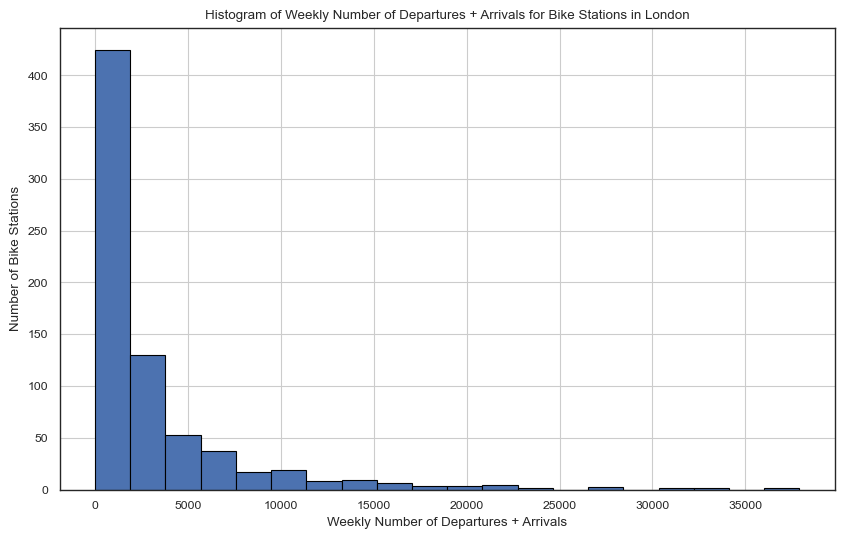

In [145]:
import matplotlib.pyplot as plt

# Assuming you have the data in the DynamicGraphTemporalSignal object called 'dataset'

# Get the number of snapshots in the dataset
num_snapshots = dataset.snapshot_count

# Extract the weekly number of departures plus arrivals for each bike station
weekly_departures_arrivals = []
for time_index in range(num_snapshots):
    node_data = dataset[time_index].y.sum(dim=0)  # Sum over the node dimension
    weekly_sum = node_data.sum().item()
    weekly_departures_arrivals.append(weekly_sum)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(weekly_departures_arrivals, bins=20, edgecolor='black')
plt.xlabel('Weekly Number of Departures + Arrivals')
plt.ylabel('Number of Bike Stations')
plt.title('Histogram of Weekly Number of Departures + Arrivals for Bike Stations in London')
plt.grid(True)
plt.show()
